In [6]:
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time

# 分三类

# 读取数据
feature=pd.read_csv(r'../data/room36252/new_flagfeature_final_room36252danmu0318.csv')

feature=feature.iloc[:, 3:9]
feature=feature[0:260]
# display(feature)
num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
Kernel='linear'
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:6], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                    probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                    max_iter=-1, decision_function_shape=None,random_state=None)
    # 训练模型
    print('Training begin...')
    start=time.clock()
    svm_clf.fit(X_train, y_train) 
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = svm_clf.predict(X_test)
    print('y_predict', y_pre)
    print('y_true', y_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1
        else:
            print('the predict is ',y_pre[i],', but the true is ',y_test[i])
    print('测试集大小', len(y_test))
    print('预测正确个数', sum)
    print('epoch[', k+1, '] ', sum/len(y_test))
    rate.append(sum/len(y_test))
    print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('所用核为：',Kernel)
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)



flag
-1.0     26
 0.0    123
 1.0    111
dtype: int64

Training begin...
Training finish
Train Time:  0.001464700000042285
y_predict [ 0.  0. -1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.
 -1.  0.  0.  0.  0.  1.  1. -1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  0.  1.  0.  1.  0.  0.  1.  1.  0.  1. -1.  0.  1.  1.  1.  0.]
y_true [ 0.  0. -1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  1. -1.  1.  0.  0.  0.
 -1.  0.  0.  0.  0.  1.  1. -1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  0.  1.  0.  0.  0.  0.  1.  1.  0.  1. -1.  0.  1.  1.  1.  0.]
the predict is  0.0 , but the true is  -1.0
the predict is  1.0 , but the true is  0.0
测试集大小 52
预测正确个数 50
epoch[ 1 ]  0.9615384615384616

Training begin...
Training finish
Train Time:  0.002039499999966665
y_predict [ 0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.
  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1. -1.  1.  1.  1.  0. -1.  1.  0.  1.  0.]
y_true [ 0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0. -1.  1.

the predict is  0.0 , but the true is  -1.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  -1.0
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
测试集大小 52
预测正确个数 45
epoch[ 34 ]  0.8653846153846154

Training begin...
Training finish
Train Time:  0.000931100000002516
y_predict [ 1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.
  0. -1.  0.  1.  1. -1.  0. -1.  0.  0.  0.  0.  0.  1.  0.  0. -1.  0.
  0. -1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.]
y_true [ 0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.
  0. -1.  0.  1.  1. -1.  0. -1.  0.  0.  1.  0.  0.  1.  0.  0. -1.  0.
  0. -1.  1.  1.  1.  0. -1.  1. -1.  1.  0.  0.  1.  0.  0.  1.]
the predict is  1.0 , but the true is  0.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the pre

y_predict [ 1.  1.  1.  1.  0.  1.  0. -1. -1.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  1.  1.  0.  0.  1. -1. -1.  1.  0.  0.  1. -1.  1.  1.  0.  0.  0.
  1.  0. -1.  1.  0.  1.  1.  0.  0. -1.  0.  1.  1.  0.  0.  0.]
y_true [ 1.  1.  1.  1.  0.  1.  1. -1. -1.  0.  1.  0.  0.  0.  0.  1.  1.  1.
  0.  1.  1.  0.  0.  1. -1. -1.  1.  0.  1.  1. -1.  1.  1.  0.  0.  0.
  1.  0. -1.  1.  0.  1.  1.  1.  0. -1. -1.  0.  1.  0.  0.  0.]
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  -1.0
the predict is  1.0 , but the true is  0.0
测试集大小 52
预测正确个数 46
epoch[ 58 ]  0.8846153846153846

Training begin...
Training finish
Train Time:  0.0015511999999944237
y_predict [ 1.  1. -1.  1.  1.  0.  0.  0.  0.  1.  0. -1.  0.  1.  1.  0.  1.  0.
  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0. -1.  1.
  0.  1.  0.  1.  0.  1

the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
the predict is  0.0 , but the true is  1.0
测试集大小 52
预测正确个数 49
epoch[ 83 ]  0.9423076923076923

Training begin...
Training finish
Train Time:  0.001225699999963581
y_predict [ 0.  0.  0.  0. -1.  1.  1.  0.  0.  0.  1.  1.  0. -1.  1.  1.  0.  0.
  0.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.
  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.]
y_true [ 0.  1.  0.  0. -1.  1.  1.  0.  0.  0.  1.  1.  0. -1.  1.  1.  0.  0.
  0.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.
  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0.]
the predict is  0.0 , but the true is  1.0
测试集大小 52
预测正确个数 51
epoch[ 84 ]  0.9807692307692307

Training begin...
Training finish
Train Time:  0.0019773999999870284
y_predict [ 1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1

In [9]:
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import time

# 分两类

# 读取数据
feature=pd.read_csv(r'../data/room36252/new_flagfeature_final_room36252danmu0318.csv')

feature=feature.iloc[:, 3:9]
feature=feature[0:260]
# display(feature)
# -1变0
flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)
rate=[]
Kernel='linear'
epoch=100
maxrate=0
meanrate=0
minrate=1
meantime=0
for k in range(epoch):
    # 划分训练集测试集
    X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:6], data[:, 0], test_size=0.2, random_state=k)   
    # 搭建svm模型
    svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                    probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                    max_iter=-1, decision_function_shape=None,random_state=None)
    # 训练模型
    print('Training begin...')
    start=time.clock()
    svm_clf.fit(X_train, y_train) 
    end=time.clock()
    print('Training finish')
    print('Train Time: ',end-start)
    meantime=meantime+(end-start)
    # 测试模型
    y_pre = svm_clf.predict(X_test)
#     print('y_predict', y_pre)
#     print('y_true', y_test)
    # 计算准确率
    sum=0
    for i in range(len(y_test)):
        if y_pre[i]==y_test[i]:
            sum=sum+1
#         else:
#             print('the predict is ',y_pre[i],', but the true is ',y_test[i])
#     print('测试集大小', len(y_test))
#     print('预测正确个数', sum)
#     print('epoch[', k+1, '] ', sum/len(y_test))
    rate.append(sum/len(y_test))
#     print('')
    meanrate+=rate[k]
    if rate[k]>maxrate:
        maxrate=rate[k];
    if rate[k]<minrate:
        minrate=rate[k];    
print('所用核为：',Kernel)
print('最高准确率：', maxrate)
print('最低准确率：', minrate)
print('平均准确率：', meanrate/epoch)
print('平均训练用时：', meantime/epoch)

flag
0.0    149
1.0    111
dtype: int64

Training begin...
Training finish
Train Time:  0.0017133999999714433
Training begin...
Training finish
Train Time:  0.0013069999999970605
Training begin...
Training finish
Train Time:  0.000994300000002113
Training begin...
Training finish
Train Time:  0.002032699999972465
Training begin...
Training finish
Train Time:  0.0011896999999407853
Training begin...
Training finish
Train Time:  0.0010686000000532658
Training begin...
Training finish
Train Time:  0.0006204999999681604
Training begin...
Training finish
Train Time:  0.000609299999950963
Training begin...
Training finish
Train Time:  0.0008073000000194952
Training begin...
Training finish
Train Time:  0.0008205999999972846
Training begin...
Training finish
Train Time:  0.0006012000000055195
Training begin...
Training finish
Train Time:  0.000709600000050159
Training begin...
Training finish
Train Time:  0.0005672999999433159
Training begin...
Training finish
Train Time:  0.0005634000000327433
Training begin...
Training finish
Trai

flag
0.0    149
1.0    111
dtype: int64

Training begin...
Training finish
Train Time:  0.0013893000000280153
所用核为： linear
准确率： 0.9807692307692307
报告               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.96      1.00      0.98        22

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52

auc 0.996969696969697


<Figure size 432x288 with 0 Axes>

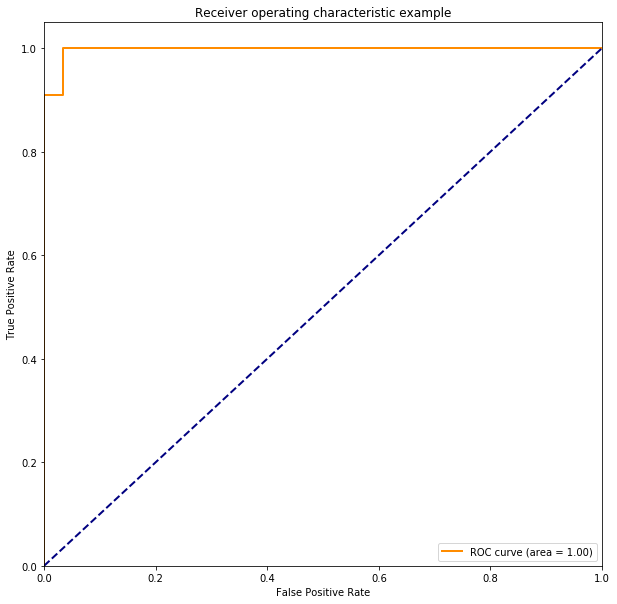

In [14]:
%matplotlib inline
from sklearn import svm  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import pandas as pd
import time
import matplotlib.pyplot as plt

# 分两类

# 读取数据
feature=pd.read_csv(r'../data/room36252/new_flagfeature_final_room36252danmu0318.csv')

feature=feature.iloc[:, 3:9]
feature=feature[0:260]
# display(feature)
# -1变0
flag=feature['flag'].tolist()
new_flag=[]
for i in flag:
    if i==-1:
        new_flag.append(0)
    else:
        new_flag.append(i)
feature['flag']=new_flag        

num_group=feature.groupby(['flag'])
display(num_group.size())
    
data=np.array(feature)
# display(data)

Kernel='linear'

# 划分训练集测试集
X_train,X_test, y_train, y_test  = train_test_split(data[:, 1:6], data[:, 0], test_size=0.2, random_state=0)   
# 搭建svm模型
svm_clf=svm.SVC(C=1, kernel=Kernel, degree=3, gamma='auto', coef0=0.0, shrinking=True, \
                probability=False,tol=0.001, cache_size=400, class_weight=None, verbose=False, \
                max_iter=-1, decision_function_shape=None,random_state=None)
# 训练模型
print('Training begin...')
start=time.clock()

y_score = svm_clf.fit(X_train, y_train).decision_function(X_test)
end=time.clock()
print('Training finish')
print('Train Time: ',end-start)

# 测试模型
y_pre = svm_clf.predict(X_test)
#     print('y_predict', y_pre)
#     print('y_true', y_test)
# 计算准确率

fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

target=['0','1']
print('所用核为：',Kernel)
print('准确率：',accuracy_score(y_test,y_pre))
print('报告',classification_report(y_test,y_pre,target_names=target))
print('auc',roc_auc)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
